In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

dataset_id = "PXD027742" # Indicate Dataset Here
# "MSV000086809", "PXD027742", "MSV000086004", "PXD016573", "PXD016057_and_PXD017626", "PXD020586", "MSV000085959"

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx"

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]



sdrf_df["label"] = sdrf_df["label"].astype(str)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                                'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                                'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()

all_channels = ["126","127N","127C","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N","134C","135N"]

channels = []

info_dict = {}
for dataset in datasets:
    info_dict[dataset] = sdrf_df.loc[sdrf_df["File_Name"] == dataset]

first_info_df = info_dict[datasets[0]]
first_info_df.reset_index(drop=True, inplace=True)

for channel in all_channels:
    if first_info_df.index[first_info_df["label"] == channel].tolist():
        row = first_info_df.index[first_info_df["label"] == channel].tolist()[0]
        channel_type = first_info_df["type"].iloc[row]
        if (channel_type == "single"):
            channels.append(channel)

psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=channels)

data_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]
    

print(channels)
# channels = ["127N","128N","128C","129N","129C","130N","130C"] # ,"131N","131C","132N","132C","133N","133C","134N"] #Excluding 126 and 127C because reasons

medians_df = pd.DataFrame(index=datasets, columns=channels)


for dataset in datasets:
    curr_df =  data_dict[dataset]
    for channel in channels:
        chan_df = curr_df.loc[curr_df["variable"] == channel]
        medians_df.at[dataset, channel] = chan_df['value'].median()
        
medians_df['Median'] = medians_df[channels].median(axis=1)

# psm_df
# sdrf_df
# first_info_df
medians_df


# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))

['127N', '128N', '128C', '129N', '129C', '130N', '130C', '131N', '131C', '132N', '132C', '133N', '133C', '134N']


,127N,128N,128C,129N,129C,130N,130C,131N,131C,132N,132C,133N,133C,134N,Median
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,18881.9648,21571.6074,21546.6348,22032.1504,21720.3711,19662.6133,21321.5098,19278.1758,19585.4785,19105.3867,18365.2617,21667.4199,16267.752,20029.834,19846.22365
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,18754.2246,21472.7588,21153.64845,21750.86915,21220.82225,19760.9502,20741.833,19152.74805,19658.75095,19024.5625,18405.48145,21549.17285,16025.0171,19783.11035,19772.030275
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,17819.01565,13464.6294,16351.24465,13132.41015,13021.77685,11961.5972,12519.26415,11889.97995,12081.2915,11502.251,11708.0835,12799.05905,10005.24025,12313.9287,12416.596425
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,18971.4502,14238.2671,17853.96585,13744.16945,13682.88965,12541.19385,13461.61475,12552.8589,13053.0254,12016.51615,11893.76415,13785.38915,10597.5249,12911.5376,13257.320075
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,15328.5811,16331.6299,16709.998,16458.3457,16197.1836,14843.6328,15801.1143,14347.5322,14559.4219,14354.2461,13994.3223,16446.4727,12217.791,15157.1416,15242.86135
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,15677.293,16778.7207,17124.2891,17078.8555,16419.7109,15363.123,16384.2832,14852.8789,15216.9482,14862.7559,14367.8945,16963.8203,12548.2383,15321.7578,15520.208
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,24900.55275,13403.04835,20585.6045,12731.43315,12518.44725,11617.7085,12465.8789,11371.3496,11548.24025,11088.27345,10923.1914,12338.9736,9748.3667,11695.03615,12017.004875
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,24698.7227,13339.9229,20737.8125,12904.1768,12575.9141,11680.5449,12600.7705,11354.3633,11626.6992,11305.0098,11172.7314,12833.6172,9806.1123,11794.4434,12185.17875
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,15477.24075,14589.13575,15971.79345,14765.19485,14128.36275,13119.37405,14187.1621,12805.1167,13188.2202,12776.53955,12528.7412,14463.98535,11082.4072,13297.11815,13712.74045
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,13667.335,12933.208,14018.0986,12779.3867,12521.0,11713.624,12285.8193,11568.7705,11848.3682,11221.7363,10985.4727,12598.1045,9831.3213,11840.2539,12067.09375


In [2]:
variance_df = pd.DataFrame(index=datasets, columns=channels)

for dataset in datasets:
    for channel in channels:
        variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]

# sigmas = variance_df[channels].std()
sigma = np.nanstd(variance_df[channels])
mean = np.nanmean(variance_df[channels])
# print(sigmas)
print(sigma)
print(mean)

for dataset in datasets:
    for channel in channels:
        curr_col = variance_df[channel]
        variance_df = variance_df[(curr_col <= mean+(5*sigma))]
        
        if (variance_df.at[dataset, channel] > mean+(5*sigma)): 
            variance_df.at[dataset, channel] = np.nan
            
        
variance_df
# variance_df.to_csv("variance.csv")

AttributeError: 'float' object has no attribute 'ndim'

In [3]:
boost_volumes = set()

variance_df["Carrier Volume"] = ''

# variance_df["Injection Time"] = ''

for dataset in datasets:
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    all_channels = info_df["label"]
    boost_volume = 0
    
    for channel in all_channels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
    
    boost_volumes.add(boost_volume)
    
#     if "300ms" in dataset:
#         variance_df.at[dataset, "Injection Time"] = "300ms"
#         
#     elif "500ms" in dataset:
#         variance_df.at[dataset, "Injection Time"] = "500ms"
    
    variance_df.at[dataset, "Carrier Volume"] = boost_volume
    
variance_df["Carrier Volume"] = pd.to_numeric(variance_df["Carrier Volume"], errors='coerce')
variance_df.sort_values(by=["Carrier Volume"], ascending=True)

variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(int)
# variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(str) + "x"


print(boost_volumes)

variance_df


{0.0, 98.0, 42.0, 14.0, 434.0, 210.0}


,127N,128N,128C,129N,129C,130N,130C,131N,131C,132N,132C,133N,133C,134N,Carrier Volume
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,0.951413,1.086938,1.085679,1.110143,1.094433,0.990748,1.074336,0.971378,0.986862,0.962671,0.925378,1.091765,0.81969,1.009252,14
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,0.948523,1.086017,1.069877,1.100083,1.073275,0.99944,1.049049,0.968679,0.994271,0.962196,0.930885,1.089882,0.810489,1.00056,14
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,1.435097,1.084406,1.316886,1.05765,1.04874,0.963356,1.008269,0.957588,0.972995,0.926361,0.942938,1.030803,0.805796,0.991731,210
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,1.431017,1.073993,1.346725,1.036723,1.032101,0.945983,1.01541,0.946862,0.98459,0.906406,0.897147,1.039832,0.799372,0.973918,210
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,1.005624,1.071428,1.096251,1.079741,1.062608,0.973809,1.036624,0.941262,0.955163,0.941703,0.91809,1.078962,0.801542,0.994376,42
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,1.010121,1.081089,1.103354,1.100427,1.057957,0.989879,1.055674,0.957003,0.98046,0.957639,0.925754,1.093015,0.80851,0.987213,42
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,2.07211,1.11534,1.71304,1.059451,1.041728,0.966772,1.037353,0.946272,0.960992,0.922715,0.908978,1.026793,0.811214,0.973207,434
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,2.026948,1.094766,1.701888,1.059006,1.032066,0.958586,1.034106,0.931818,0.954167,0.927767,0.916912,1.053215,0.804757,0.967934,434
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,1.128676,1.063911,1.164741,1.07675,1.030309,0.956729,1.034597,0.933812,0.961749,0.931728,0.913657,1.054784,0.808183,0.969691,98
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,1.132612,1.071775,1.16168,1.059028,1.037615,0.970708,1.018126,0.958704,0.981874,0.929945,0.910366,1.044005,0.814722,0.981202,98


In [4]:
counts_df = pd.DataFrame(index=["Above","Below", "Average", "St Dev"], columns=channels)

for channel in channels:
    column = variance_df[channel]
    counts_df.at["Above", channel] = column[column > 1.00].count()
    counts_df.at["Below", channel] = column[column < 1.00].count()
    counts_df.at["Average", channel] = column.mean()
    counts_df.at["St Dev", channel] = column.std()
    
counts_df

,127N,128N,128C,129N,129C,130N,130C,131N,131C,132N,132C,133N,133C,134N
Above,8,12,12,12,12,2,12,0,0,0,0,12,0,2
Below,4,0,0,0,0,10,0,12,12,12,12,0,12,10
Average,1.2439,1.079961,1.231829,1.07775,1.044344,0.978153,1.036824,0.951696,0.974751,0.942112,0.920946,1.059187,0.811191,0.985812
St Dev,0.418644,0.015135,0.245411,0.023394,0.024698,0.021886,0.018365,0.012334,0.014551,0.021528,0.012475,0.023581,0.009935,0.012912


In [5]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
variance_df.reset_index(drop=True, inplace=True)

anova_df = pd.melt(variance_df.reset_index(), id_vars=['index'], value_vars=channels, ignore_index=False)

anova_df.columns = ['index', 'treatments', 'value']

res = stat()

anova_df



# res.anova_stat(df=anova_df, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary


# output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,index,treatments,value
0,0,127N,0.951413
1,1,127N,0.948523
2,2,127N,1.435097
3,3,127N,1.431017
4,4,127N,1.005624
...,...,...,...
7,7,134N,0.967934
8,8,134N,0.969691
9,9,134N,0.981202
10,10,134N,0.987609


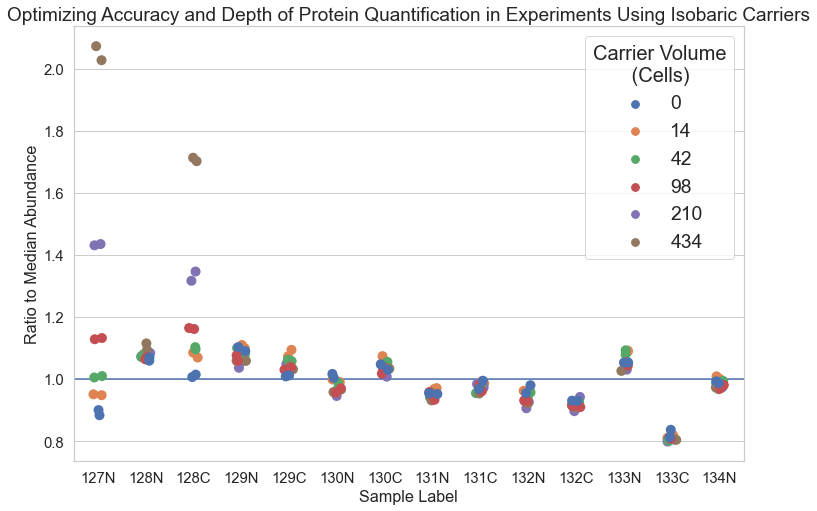

In [7]:
to_graph_df = pd.melt(variance_df, id_vars=["Carrier Volume"], value_vars=channels, ignore_index=False) # ,"131N","131C","132N","132C","133N","133C","134N"]
to_graph_df["Dataset"] = to_graph_df.index
to_graph_df

plt.figure(figsize=(12, 8)) # Original: (16, 8.27)

sns.set(font_scale=1.35)
sns.set_style("whitegrid")

if (len(boost_volumes) == 1):
    title = dataset_id + ": " + str(round(next(iter(boost_volumes)))) + "x Carrier"
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, color='0', s=10, 
                     order=channels) # "131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
else:
    title = "Optimizing Accuracy and Depth of Protein Quantification in Experiments Using Isobaric Carriers"    
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Carrier Volume", s=10, 
                     order=channels) # "131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
    
    plt.legend(title="Carrier Volume\n       (Cells)", fontsize='large', title_fontsize='20') # , alignment="center") # Need to Update matplotlib
    
boxplot.set_title(title, fontsize=19)

plt.axhline(y=1)

boxplot.set(xlabel="Sample Label", ylabel="Ratio to Median Abundance") # Change y label

# plt.savefig(dataset_id + "/" + dataset_id + "_median_figure.png", dpi=400)
plt.show()